# Single Neuron Model

A single neuron model is a simplified representation of a biological neuron, used in the field of artificial neural networks and computational neuroscience. This model captures the basic functionality of a real neuron, which is the fundamental building block of the nervous system.

## The Perceptron

The perceptron is a simple mathematical model of a biological neuron or a single-layer artificial neural network. It was introduced by Frank Rosenblatt in 1957. The perceptron takes multiple binary inputs, processes them with certain weights, and produces a single binary output. The model is often used for binary classification problems.

1. **Inputs**: The perceptron takes multiple binary inputs (usually denoted as $x_1, x_2, ..., x_n$)
2. **Weights**: Each input is associated with a weight (denoted as $w_1, w_2, ..., w_n$). These weights determine the strength of the respective inputs. A larger weight means that the corresponding input has a stronger influence on the output.
3. **Summation**: The weighted inputs are summed up $z = w_1 ⋅ x_1 + w_2 ⋅ x_2 + ... + w_n ⋅ x_n$
4. **Activation Function**: The sum $z$ is then passed through an activation function. In the original perceptron model, the step function was commonly used as the activation function. The step function outputs 1 if the sum $z$ is greater than or equal to a threshold, and 0 otherwise.
5. **Learning Algorithm**: The perceptron is trained using a supervised learning algorithm. During training, the weights are adjusted based on the error in the prediction compared to the true output. One common algorithm for updating weights is the perceptron learning rule.

The perceptron has limitations, such as its inability to handle non-linearly separable data. However, it laid the foundation for more complex neural network architectures, such as multi-layer perceptrons, which can address more complex tasks.

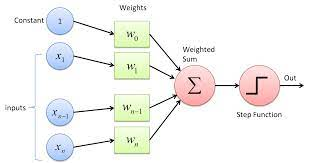

We will implement this on the "Palmer Penguins" dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set the Seaborn theme
sns.set_theme()

# Read the Palmer Penguin dataset into a pandas DataFrame object
penguins = sns.load_dataset('penguins')

# Display the DataFrame
display(penguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


The Perceptron algorithm is designed for binary classification tasks, meaning it classifies instances into two categories. In this context, we must select two out of the three penguin species to apply and train the Perceptron. Specifically, we will concentrate on the "Adelie" and "Chinstrap" penguin species. The relevant data for these two species will be filtered out of the initial DataFrame and stored in a new one. Please execute the provided code in the cell below.

In [2]:
# Create a new DataFrame with only "Adelie" and "Chinstrap" species
selected_species = penguins[(penguins['species'] == 'Adelie') | (penguins['species'] == 'Chinstrap')]

# Display the new DataFrame
display(selected_species)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,Female
217,Chinstrap,Dream,49.6,18.2,193.0,3775.0,Male
218,Chinstrap,Dream,50.8,19.0,210.0,4100.0,Male


The perceptron has the capability to handle any number of feature measurements, but for simplicity, we concentrate on two specific features: "bill length" and "bill width." Additionally, it is necessary to convert the string labels corresponding to each species into numerical values. For instance, we map the "Adelie" species to -1 and the "Chinstrap" species to 1. The provided code performs the required data preprocessing to achieve these desired formats.

In [3]:
# Select the first 220 rows and the desired species values
y = penguins.iloc[:220].species.values

# Convert each entry of y with "Adelie" to -1 and "Chinstrap" otherwise to 1
y = np.where(y == 'Adelie', -1, 1)

# Store the desired feature measurements in the matrix X
X = penguins[["bill_length_mm", "bill_depth_mm"]].iloc[:220].values

Next, we define a custom Python class responsible for holding key attributes such as the scaling value for the cost function, the number of epochs during training, the weights (including bias), and the errors encountered during training on a specific instance. Furthermore, this Python class incorporates essential methods such as training, input handling, and prediction. Execute the provided code in the cell below.

In [4]:
class Perceptron(object):
    def __init__(self, eta=0.5, epochs=1000):
        """
        Perceptron constructor.

        Parameters:
        - eta: Learning rate (default is 0.5).
        - epochs: Number of training epochs (default is 50).
        """
        
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        """
        Train the perceptron.

        Parameters:
        - X: Input features.
        - y: Target values.

        Returns:
        - self: Trained perceptron.
        """
        
        # Initialize weights with random values
        self.w_ = np.random.rand(1 + X.shape[1])

        # List to store the number of misclassifications in each epoch
        self.errors_ = []

        # Training loop over the specified number of epochs
        for _ in range(self.epochs):
            errors = 0
            # Iterate over each input instance and its target value
            for xi, target in zip(X, y):
                # Update weights based on the perceptron learning rule
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi
                self.w_[-1] -= update
                errors += int(update != 0)  # Count misclassifications
            # If there are no misclassifications, training is complete
            if errors == 0:
                return self
            else:
                # Store the number of misclassifications for this epoch
                self.errors_.append(errors)

        return self

    def net_input(self, X):
        """
        Calculate the net input.

        Parameters:
        - X: Input features.

        Returns:
        - np.dot(X, self.w_[:-1]) + self.w_[-1]: The net input.
        """
        return np.dot(X, self.w_[:-1]) + self.w_[-1]

    def predict(self, X):
        """
        Make predictions based on the net input.

        Parameters:
        - X: Input features.

        Returns:
        - np.where(self.net_input(X) >= 0.0, 1, -1): Predicted class labels.
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Following that, we can create an instance of the Perceptron class and proceed to train this instance through 1000 epochs. Please execute the provided code in the cell below.

In [5]:
# Create an instance of the Perceptron class with 1000 epochs
perceptron_instance = Perceptron(eta=0.1, epochs=1000)  # Adjust the learning rate

# Train the weights and bias of the perceptron instance using the train method
perceptron_instance.train(X, y)

Upon completion of the training process, we can utilize the ```predict``` method of the Perceptron class to observe its current predictions based on input features. To promptly inspect these predictions for the entries in X, execute the provided code in the cell below.

In [6]:
# Obtain predicted labels for the features in X
predicted_labels = perceptron_instance.predict(X)

# Compare the predicted labels with the actual labels
print(y == predicted_labels)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False Fa

The output of the preceding code reveals that the predicted values do not align with every true value in the provided dataset. We can visually represent this in the code below.

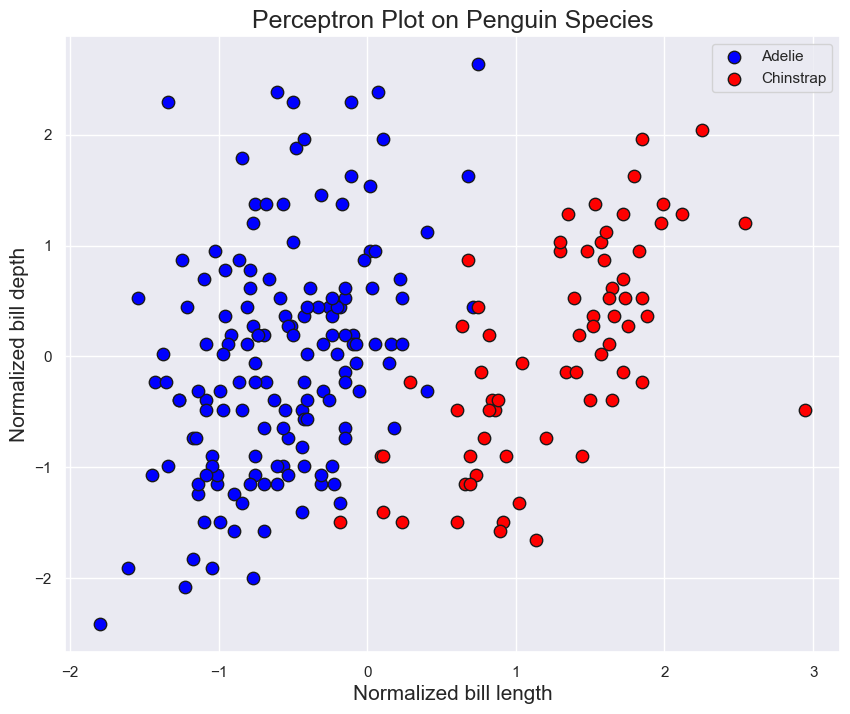

In [7]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Train the perceptron on normalized data
perceptron_instance_normalized = Perceptron(epochs=1000)
perceptron_instance_normalized.train(X_normalized, y)

# Define a meshgrid for decision boundary plotting
x_min, x_max = X_normalized[:, 0].min() - 1, X_normalized[:, 0].max() + 1
y_min, y_max = X_normalized[:, 1].min() - 1, X_normalized[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predict the labels for each point in the meshgrid
Z = perceptron_instance_normalized.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot the data points with labels for the legend
plt.scatter(X_normalized[y == -1, 0], X_normalized[y == -1, 1], label='Adelie', c='blue', edgecolors='k', s=80)
plt.scatter(X_normalized[y == 1, 0], X_normalized[y == 1, 1], label='Chinstrap', c='red', edgecolors='k', s=80)

# Add legend
plt.legend()

# Set plot title and axis labels
plt.title("Perceptron Plot on Penguin Species", fontsize=18)
plt.xlabel("Normalized bill length", fontsize=15)
plt.ylabel("Normalized bill depth", fontsize=15)

plt.show()

For what duration did the perceptron model undergo training? Fortunately, in our Perceptron class definition, we captured the errors incurred by the model during each iteration of an epoch in the ```errors_ attribute```. To inspect these errors across each epoch, execute the following code in the cell below.

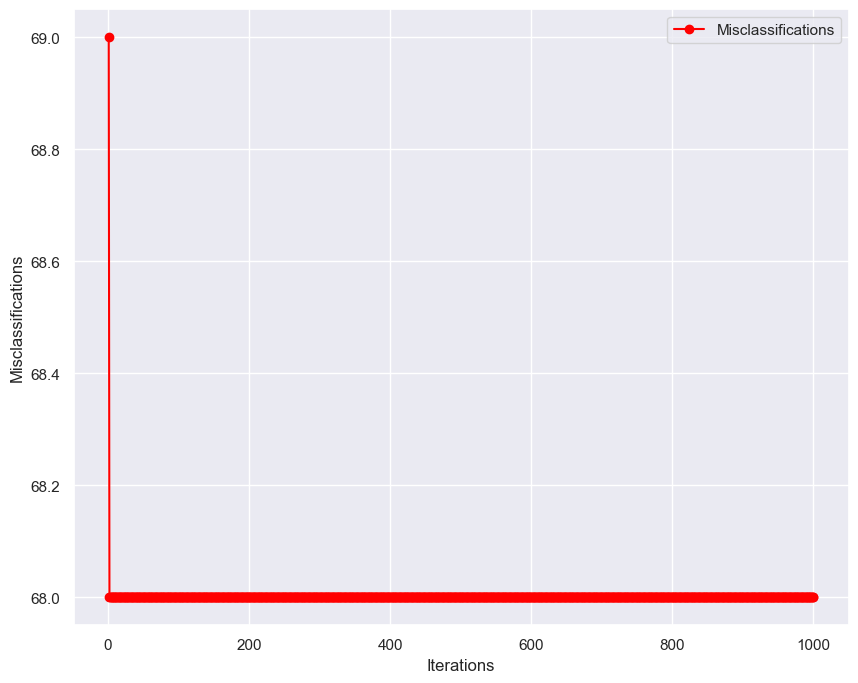

In [8]:
# Create a line plot for error analysis with markers
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(perceptron_instance.errors_) + 1), perceptron_instance.errors_, marker='o', linestyle='-', color='red', label='Misclassifications')

# Set axis labels and legend
plt.xlabel("Iterations")
plt.ylabel("Misclassifications")
plt.legend()

# Display the plot
plt.show()

# Conclusion

In conclusion, the implementation and analysis of the Perceptron model for the classification of penguin species provided valuable insights into its training process and decision-making. The plots offered a comprehensive view of the model's performance. Despite its simplicity, the Perceptron serves as a foundational concept in machine learning and provides a stepping stone for more complex models. Further enhancements and explorations can be pursued to improve its accuracy and versatility in handling diverse datasets